In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving logs_MAX_3_SAT.csv to logs_MAX_3_SAT.csv
User uploaded file "logs_MAX_3_SAT.csv" with length 26216 bytes


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
sat_df = pd.read_csv("logs_MAX_3_SAT.csv")
sat_df.head()

,Number of variables,Number of clauses,result 7/8,time 7/8,result LSU,time LSU,result LSU interrupted
0,5,100,94,0.045948,94,0.012208,94
1,5,100,96,0.027060,96,0.004874,96
2,5,100,91,0.026577,92,0.013806,92
3,5,100,93,0.041603,93,0.015898,93
4,5,100,95,0.029936,95,0.011284,95


In [ ]:
sat_df["7/8 proportion"] = sat_df["result 7/8"] / sat_df["Number of clauses"]
sat_df["LSU proportion"] = sat_df["result LSU"] / sat_df["Number of clauses"]
sat_df["7/8 achieved ratio"] = sat_df["7/8 proportion"] / sat_df["LSU proportion"]
sat_df["LSU interrupted proportion"] = sat_df["result LSU interrupted"] / sat_df["Number of clauses"]
sat_df["proportion LSU 7/8: int"] = sat_df["7/8 proportion"] / sat_df["LSU interrupted proportion"]
sat_df.head()

,Number of variables,Number of clauses,result 7/8,time 7/8,result LSU,time LSU,result LSU interrupted,7/8 proportion,LSU proportion,7/8 achieved ratio,LSU interrupted proportion,proportion LSU 7/8: int
0,5,100,94,0.045948,94,0.012208,94,0.94,0.94,1.00000,0.94,1.00000
1,5,100,96,0.027060,96,0.004874,96,0.96,0.96,1.00000,0.96,1.00000
2,5,100,91,0.026577,92,0.013806,92,0.91,0.92,0.98913,0.92,0.98913
3,5,100,93,0.041603,93,0.015898,93,0.93,0.93,1.00000,0.93,1.00000
4,5,100,95,0.029936,95,0.011284,95,0.95,0.95,1.00000,0.95,1.00000


In [ ]:
sat_df["7/8 proportion"].describe()

count    450.000000
mean       0.920161
std        0.020116
min        0.884444
25%        0.906000
50%        0.916458
75%        0.930000
max        0.990000
Name: 7/8 proportion, dtype: float64

In [ ]:
sat_df["7/8 achieved ratio"].describe()

count    450.000000
mean       0.998242
std        0.004518
min        0.966387
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: 7/8 achieved ratio, dtype: float64

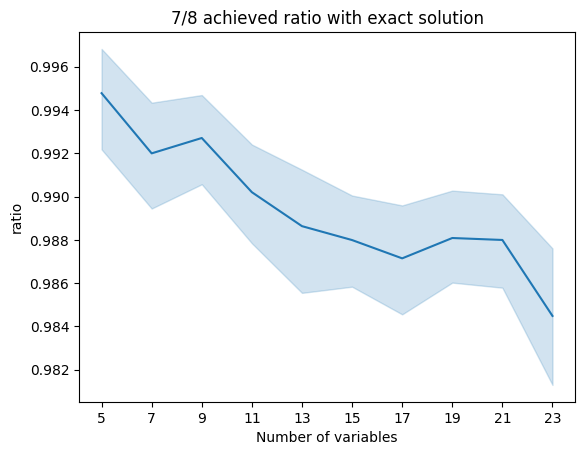

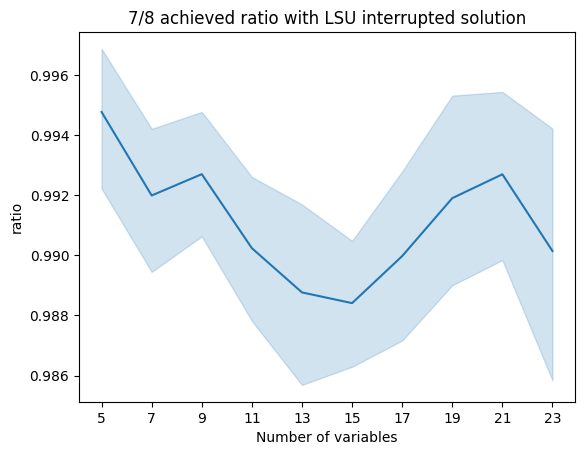

In [ ]:

sns.lineplot(data=sat_df, x="Number of variables", y="proportion LSU 7/8: int").set(title = f"7/8 achieved ratio with LSU interrupted solution", xticks = np.arange(5, 23+1, step = 2), ylabel = "ratio")
plt.show()

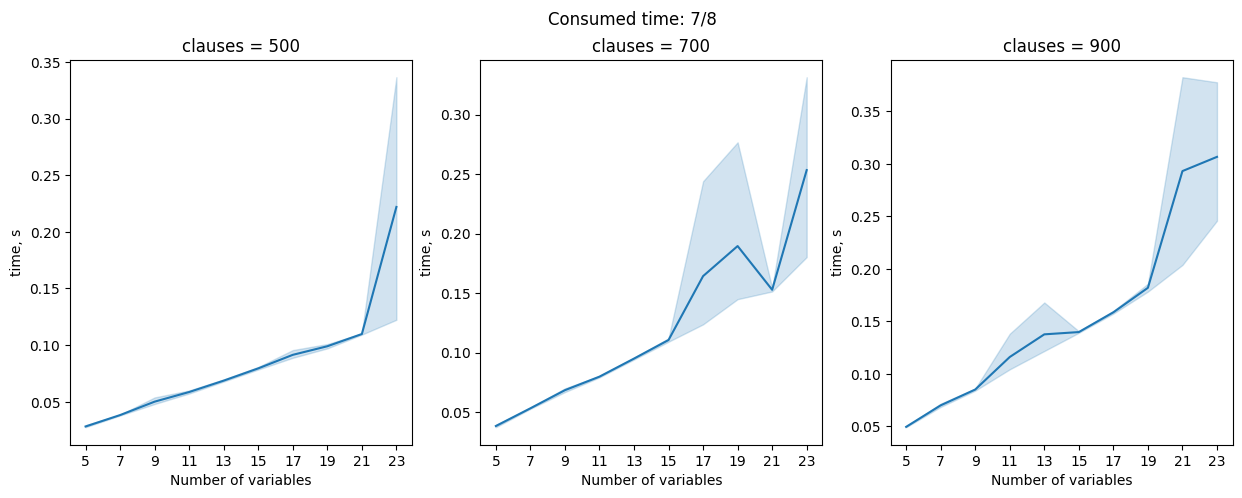

In [ ]:

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for index, clauses in enumerate((500, 700, 900)):
  sns.lineplot(data=sat_df[sat_df["Number of clauses"] == clauses], x="Number of variables", y="time 7/8",ax = ax[index]).set(title = f"clauses = {clauses}", ylabel = "time, s",xticks = np.arange(5, 23+1, step = 2))
fig.suptitle("Consumed time: 7/8")
plt.show()

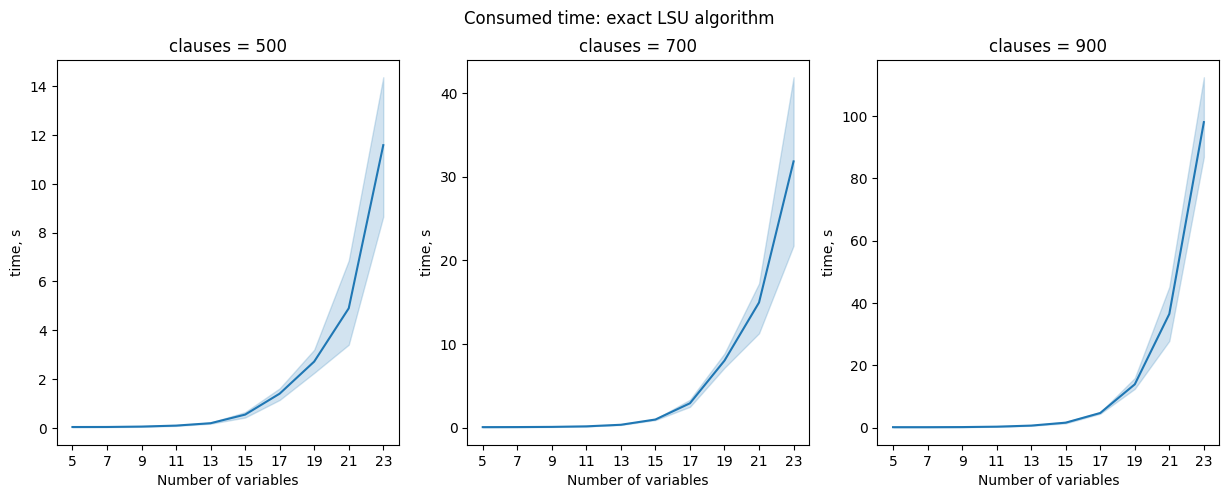

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for index, clauses in enumerate((500, 700, 900)):
  sns.lineplot(data=sat_df[sat_df["Number of clauses"] == clauses], x="Number of variables", y="time LSU",ax = ax[index]).set(title = f"clauses = {clauses}", ylabel = "time, s", xticks = np.arange(5, 23+1, step = 2))
fig.suptitle("Consumed time: exact LSU algorithm")
plt.show()